# Problem description
In this project, we tackle a classification problem to predict the news BBC right category. The categories are: business, entertainment, politics, sport or tech.

Project Objectives
- Train and compare unsupervised and supervised approaches to solve this prolem

- Evaluate model performance using accuracy.

Github: https://github.com/SalvadorBValladolid/bbc-news-classification

# Data description
The data is composed into three csv.
- Train: Training articules of news and their respective category.
- Test: Testing aricles of news without category. This is for kaggle sumbision.
- Sample solution: How to upload the solution to kaggle.

The data can be found at: https://www.kaggle.com/competitions/learn-ai-bbc/data

Let's analyze them.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
train = pd.read_csv('data/BBC News Train.csv')
test = pd.read_csv('data/BBC News Test.csv')
sample_solution = pd.read_csv('data/BBC News Sample Solution.csv')

In [10]:
print('Train shape:')
print(train.shape)
print('Test shape:')
print(test.shape)
print('Sample solution shape:')
print(sample_solution.shape)

Train shape:
(1490, 3)
Test shape:
(735, 2)
Sample solution shape:
(735, 2)


Null values

In [12]:
print('Train nulls:')
print(train.isna().sum())
print('Test nulls:')
print(test.isna().sum())

Train nulls:
ArticleId    0
Text         0
Category     0
dtype: int64
Test nulls:
ArticleId    0
Text         0
dtype: int64


As we can see there are not null values.

In [5]:
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [6]:
test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [7]:
sample_solution.head()

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


### Duplicates

Let's check for duplicated values and how we handle them.

In [114]:
duplicated_news_train = train[train['Text'].duplicated()]['Text'].values

In [115]:
print('Number of duplicated news in train:')
print(len(duplicated_news_train))

Number of duplicated news in train:
50


I'll explore if they belong to te same category:

In [131]:
duplicates_train = train[np.isin(train['Text'], duplicated_news_train)].sort_values('Text')

In [132]:
duplicates_train.groupby('Text')['Category'].nunique().reset_index()['Category'].value_counts()

1    50
Name: Category, dtype: int64

As all duplicated news belong to the same category there is not problem to drop duplicates easily

In [133]:
train = train.drop_duplicates('Text')

In [134]:
print('Train shape after duplicates removal:')
print(train.shape)

Train shape after duplicates removal:
(1440, 3)


For test

In [47]:
duplicated_news_test = test[test['Text'].duplicated()]['Text'].values

In [68]:
print('Number of duplicated news in train:')
print(len(duplicated_news_test))

Number of duplicated news in train:
13


As we can see there are duplicated news in the test set, but they have different ID's and I'll upload the kaggle solution I won't do anything.

# Exploratory Data Analysis

In [69]:
import seaborn as sns

In [75]:
train['Category'].value_counts()/train.shape[0]

sport            0.237500
business         0.232639
politics         0.184722
entertainment    0.182639
tech             0.162500
Name: Category, dtype: float64

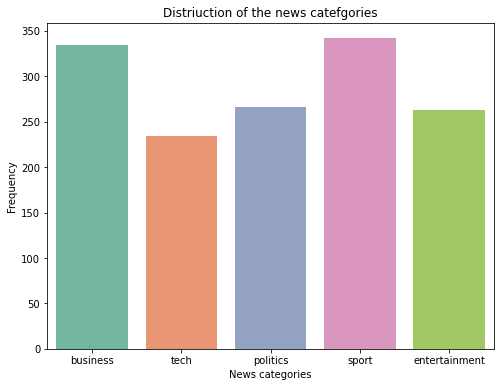

In [73]:
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='Category', palette="Set2")

plt.xlabel("News categories")
plt.ylabel("Frequency")
plt.title("Distriuction of the news catefgories")
plt.show()

In [76]:
print('Num of unique words in train before cleaning:')
print(len(train['Text'].str.split().explode().unique()))

Num of unique words in train before cleaning:
35594


In [78]:
print('Num of unique words in test before cleaning:')
print(len(test['Text'].str.split().explode().unique()))

Num of unique words in test before cleaning:
25250


Now I'll sample one new for category in order to see how they look.

In [82]:
categories = train['Category'].unique()

In [102]:
for category in categories:
    print('Category: ', category)
    print(train[train['Category'] == category].sample(1)['Text'].values[0],'....')
    print('*'*100)

Category:  business
monsanto fined $1.5m for bribery the us agrochemical giant monsanto has agreed to pay a $1.5m (£799 000) fine for bribing an indonesian official.  monsanto admitted one of its employees paid the senior official two years ago in a bid to avoid environmental impact studies being conducted on its cotton. in addition to the penalty  monsanto also agreed to three years  close monitoring of its business practices by the american authorities. it said it accepted full responsibility for what it called improper activities.  a former senior manager at monsanto directed an indonesian consulting firm to give a $50 000 bribe to a high-level official in indonesia s environment ministry in 2002. the manager told the company to disguise an invoice for the bribe as  consulting fees .  monsanto was facing stiff opposition from activists and farmers who were campaigning against its plans to introduce genetically-modified cotton in indonesia. despite the bribe  the official did not aut

They don't look as noisy compared to text from social media sources, for example, however I'll perform text clean methods to enhance the models performance.

### Word cloud for each category

In [104]:
from wordcloud import WordCloud

In [105]:
def generate_wordcloud(data, top_n, category_class):
    count_of_words = data.str.split().explode().value_counts()
    # Only show the top n most frequent words
    count_of_words = count_of_words[0:top_n]
    count_of_words_dict =  {
        count_of_words.index[i]: count_of_words.values[i] for i in range(len(count_of_words))}
    wordcloud = WordCloud(
        width=800, height=400
        ,background_color='white').generate_from_frequencies(count_of_words_dict)
    
    plt.figure(figsize=(12, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Top most {top_n} frequent words in {category_class} class')
    plt.axis('off')
    plt.show()

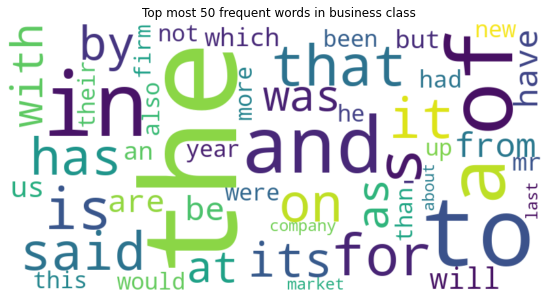

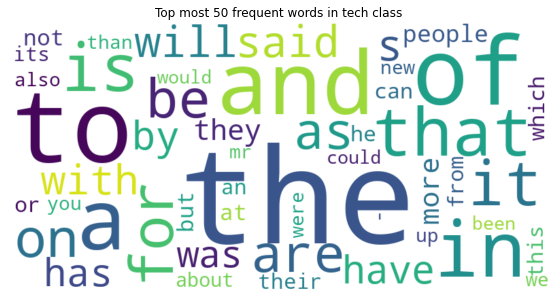

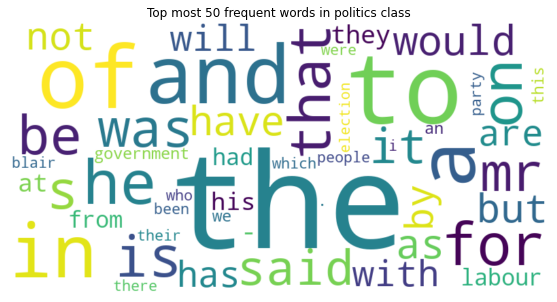

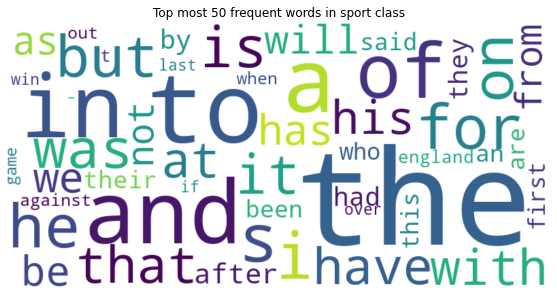

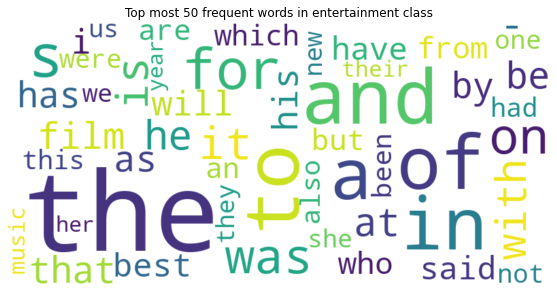

In [106]:
for category in categories:
    generate_wordcloud(
        train[train['Category'] == category]['Text'], 50, category)

- Next:
    - There are a lot of stop words, the cloudwords are not that informative, so I need to quit them 
    - I'll plot again after text cleaning in order to see the difference.
    - All the words are in lowercase
    

### Feature engineering
I was inspired by this article from https://www.analyticsvidhya.com/blog/2021/04/a-guide-to-feature-engineering-in-nlp/ In which they build some features based on the text like:

- Number of words
- Number of characters
- Counts of punctuation
- Number of links https

In [135]:
import re

In [136]:
def count_capital_chars(text):
    count = 0
    for i in text:
        if i.isupper():
            count += 1
    return count

def count_punctuations(text):
    punctuations='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~'
    d=dict()
    for i in punctuations:
        d[str(i)+' count'] = text.count(i)
    return d 

def count_urls(text):
    urls = re.findall(r'(https?://\S+|www\.\S+)', text)
    return len(urls)

In [137]:
def feature_engineering(data):
    data['number_of_words'] = data['Text'].apply(lambda x: len(str(x).split()))
    data['number_of_chars'] = data['Text'].apply(lambda x: len(str(x)))
    data['count_punctuations'] = data["Text"].apply(lambda x: count_punctuations(x))
    data['count_urls'] = data["Text"].apply(lambda x: count_urls(x))
    
    return data

In [138]:
train = feature_engineering(train)

In [139]:
test = feature_engineering(test)

In [142]:
train.groupby('Category')[['number_of_words',
       'number_of_chars', 'count_urls']].mean()

,number_of_words,number_of_chars,count_urls
Category,,,
business,334.274627,1983.925373,0.000000
entertainment,335.444867,1919.433460,0.000000
politics,451.642857,2630.078947,0.000000
sport,336.877193,1903.005848,0.002924
tech,509.222222,2980.692308,0.004274


Now, I'll process the count_pinctuations column

In [146]:
punct_cols = list(train['count_punctuations'].iloc[0].keys())

In [148]:
def preprocess_punctuation_feature(data):
    X = data.copy()
    # As count_punctuations is a list of count of each punctuation
    # we need to convert it into a dataframe.
    punct_cols = X['count_punctuations'].iloc[0].keys()
    punct_df = X['count_punctuations'].apply(pd.Series)
    
    X = pd.concat(
        [X.drop(columns=['count_punctuations']), punct_df], axis=1)
    return X

In [150]:
train = preprocess_punctuation_feature(train)

In [151]:
test = preprocess_punctuation_feature(test)

In [155]:
frequency_features = train[punct_cols].sum() / train.shape[0]

In [162]:
frequent_features = frequency_features[frequency_features>=0.06].index

In [163]:
train.groupby('Category')[frequent_features].mean()

,! count,$ count,% count,& count,( count,) count,- count,. count,/ count,: count,; count
Category,,,,,,,,,,,
business,0.000000,1.734328,2.471642,0.256716,1.056716,1.056716,4.585075,18.504478,0.068657,0.173134,0.244776
entertainment,0.197719,0.562738,0.155894,0.091255,0.798479,0.802281,5.117871,16.878327,0.163498,0.684411,0.197719
politics,0.090226,0.030075,0.481203,0.037594,0.259398,0.259398,5.210526,20.680451,0.060150,1.484962,0.086466
sport,0.014620,0.020468,0.043860,0.029240,1.502924,1.500000,6.505848,17.213450,0.067251,0.959064,0.409357
tech,0.128205,0.320513,1.029915,0.064103,0.935897,0.935897,7.897436,25.068376,0.192308,0.431624,0.111111


#### Analysis of EDA

Based on the above analysis, we can conclude the following:
- Politics and tech news have more words, they are longer news.
- Sport and tech news use URLs, we can build a features of url presence.
- Enternainment uses '!' more.
- Business uses '$' and '%' and '&' much more, which makes a lot of sense.
- We can take adventage of this punctuations features.


# Text cleaning


In [164]:
import json

# Contraction map
with open("data/contraction_map.json", "r") as f:
    CONTRACTION_MAP = json.load(f)

The contraction map is a dictionary with contractions in english, for example:



In [166]:
CONTRACTION_MAP["hadn't"]

'had not'

In [167]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

STOPWORDS = set(stopwords.words('english'))
wnl = WordNetLemmatizer()


def clean_text(text):
    """
    Convert:
    - URLs -> special tokens
    - Eliminate stop words
    - Apply lemmatizier
    """
    text = str(text)

    # Special tokens
    text = re.sub(r'https?://\S+|www\.\S+', 'URL', text)

    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'&[a-z]+;', '', text)

    # To lower
    text = text.lower()

    # Expand contractions:
    # Example: Convert y'all're to you all are
    words = text.split()
    expanded_words = []
    for word in words:
        if word in CONTRACTION_MAP:
            expanded_words.extend(CONTRACTION_MAP[word].split())
        else:
            expanded_words.append(word)

    # Reduce repeated words
    expanded_words = [re.sub(r'([a-z])\1{2,}', r'\1\1', w) for w in expanded_words]

    # Remove stop words: Example: quit 'the', 'is', 'a'
    # Lematize: 'Running' becomes 'run'
    clean_words = [wnl.lemmatize(w) for w in expanded_words if w not in STOPWORDS]

    # Join all the words together again
    clean_text = ' '.join(clean_words)
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()

    return clean_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/salvadorbarcenas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/salvadorbarcenas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/salvadorbarcenas/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [168]:
# Apply the clean text fuction to train and test
train['Text_after_cleaning'] = train['Text'].apply(clean_text)
test['Text_after_cleaning'] = test['Text'].apply(clean_text)

In [173]:
sample_train_1 = train.sample(1)
print('New before text cleaning:')
print(sample_train_1['Text'].values[0])
print('*' * 100)
print('New after text cleaning:')
print(sample_train_1['Text_after_cleaning'].values[0])

New before text cleaning:
bomb threat at bernabeu stadium spectators were evacuated from real madrid s bernabeu stadium on sunday following a bomb scare during the game between the hosts and real sociedad.  more than 70 000 people abandoned the ground with the score at 1-1 and only three minutes left to play. the basque newspaper gara apparently received a telephone call saying a bomb was due to explode at 2100 local time. but after searching the stadium with sniffer dogs  the police said that no explosive device had been found.   the police have said they have completed their search and have not found anything   said real madrid president florentino perez.  the best thing we can all do now is to put this nightmare behind us.  madrid midfielder guti told private spanish radio station cadena ser:  i have never seen this before and sport should be above it all.  real took the lead just before the break when brazilian striker ronaldo cracked home with his left foot. sociedad levelled the 

Now, I'll plot again the WordsClouds in order to see the difference.

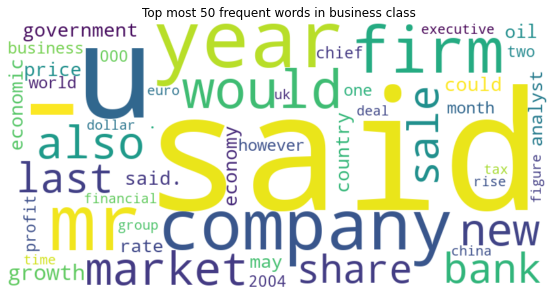

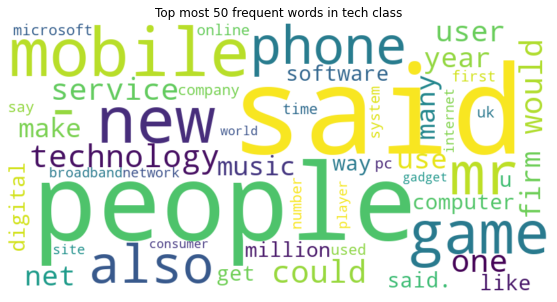

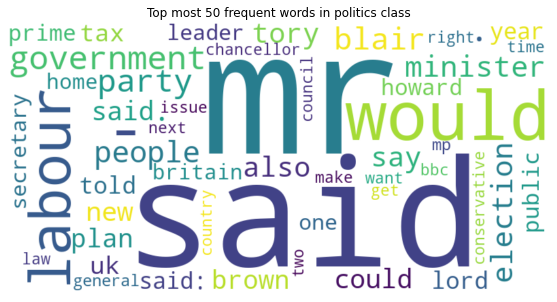

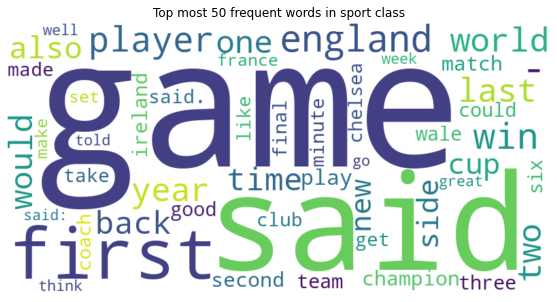

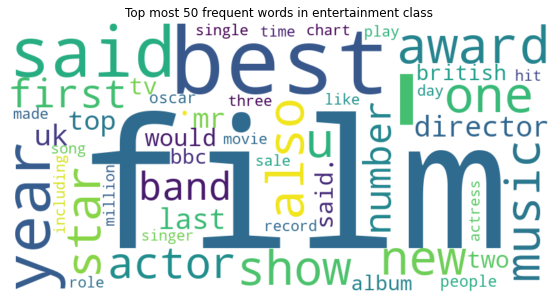

In [169]:
for category in categories:
    generate_wordcloud(
        train[train['Category'] == category]['Text_after_cleaning'], 50, category)

Now the difference is abysmal, the WordClouds makes much sense in each news category. For example:
- Business words:
    - company
    - market 
    - bank
- Tech words:
    - phone
    - technology
- etc

# Word embedding
For word embedding I'll use TF-IDF method.

- TF-IDF converts text into numeric features using term Frequency × Inverse Document Frequency. 
    - TF: The frequency of the words in a specific document.
        - TF(word, document) = Frequency of 'word' in document / # Document words
    - IDF: Measures how rare is some word in the entire corpus (all the documents).
        - IDF(word, documents) = log(# Documents / # Documents that contains 'word')
    - Finally: TF-IDF = TF * IDF
    

- It gives high weight to words frequent in a document but rare across others.
- This ensures that the key words in a document obtain higher TF-IDF, helping the model focus on the most relevant terms.

In [566]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [567]:
# 1. TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # hyperparameter: number of features , 
X_train_tfidf = vectorizer.fit_transform(train.Text_after_cleaning)
X_test_tfidf = vectorizer.transform(test.Text_after_cleaning)

Now, let's visualize them.
I'll use TruncatedSVD to reduce the dimensionality.

In [568]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=2, random_state=42)  # Reduce to 2D
train_embedding_2d = svd.fit_transform(X_train_tfidf)

In [569]:
categories = train.Category.unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))
color_dict = dict(zip(categories, colors))

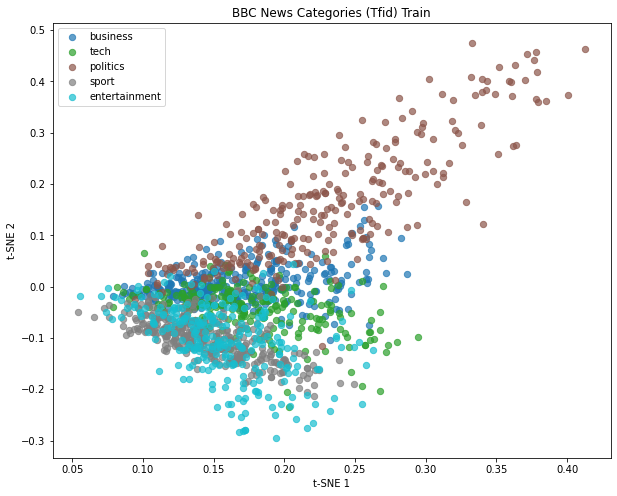

In [570]:
plt.figure(figsize=(10, 8))
for cat in categories:
    idx = train.Category == cat
    plt.scatter(
        train_embedding_2d[idx, 0], train_embedding_2d[idx, 1],
        label=cat, alpha=0.7, s=40, color=color_dict[cat])

plt.title("BBC News Categories (Tfid) Train")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()

They are not that separable, but it can be that converting the sparce matrix at 2D lost the most information.

# Model Training

#### 1)  when you train the unsupervised model for matrix factorization, should you include texts (word features) from the test dataset or not as the input matrix? Why or why not?



No, it's not ideal to include the test data as we can have model leakage and over estimate the peformance.

We don't want that the model has been influenced by the test data, because in real scenarios, the model will perform on unseen data.

#### 2) Build a model using the matrix factorization method(s) and predict the train and test data labels. 


In [571]:
from sklearn.decomposition import NMF

In [572]:
matrix_factorization = NMF(n_components=5)

In [573]:
train_pred = matrix_factorization.fit_transform(X_train_tfidf).argmax(axis=1)

In [574]:
test_pred = matrix_factorization.transform(X_test_tfidf).argmax(axis=1)

#### 3) Measure the performances on predictions from both train and test datasets. You can use accuracy, confusion matrix, etc., to inspect the performance. You can get accuracy for the test data by submitting the result to Kaggle. 

Now let's find the best permutation and get the accuracy:

In [575]:
from sklearn.metrics import accuracy_score
from itertools import permutations

In [576]:
def obtain_best_accuracy(y_true, y_pred, print_accuracy=False):
    
    labels_true = np.unique(y_true)
    labels_pred = np.unique(y_pred)
    
    perms = permutations(labels_true)

    best_acc = 0
    best_map = None

    for perm in perms:
        # Map pred labels to permuted true labels
        mapping = dict(zip(labels_pred, perm))
        y_mapped = np.array([mapping[label] for label in y_pred])
        acc = accuracy_score(y_true, y_mapped)
        if acc > best_acc:
            best_acc = acc
            best_map = mapping
    if print_accuracy:
        print("Best accuracy train data:", best_acc)
        print("Best mapping:", best_map)
    return best_acc

In [577]:
obtain_best_accuracy(y_true=train['Category'].values, y_pred=train_pred, print_accuracy=True)

Best accuracy train data: 0.9020833333333333
Best mapping: {0: 'business', 1: 'politics', 2: 'entertainment', 3: 'sport', 4: 'tech'}


0.9020833333333333

Confusion matrix

In [578]:
best_mapping = {0: 'business', 1: 'politics', 2: 'entertainment', 3: 'sport', 4: 'tech'}

In [579]:
test_pred_encoded = [best_mapping[pred] for pred in test_pred]

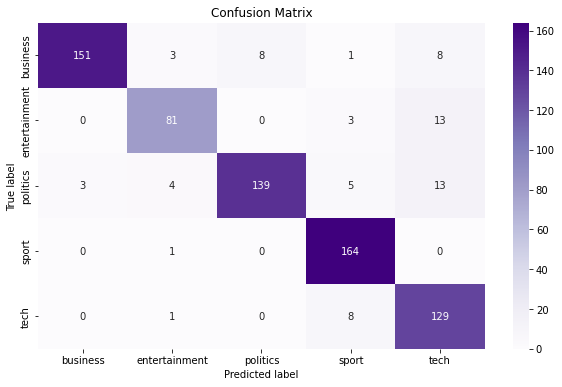

In [580]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


labels = sorted(list(set(test['Category'].values)))  
cm = confusion_matrix(test['Category'].values, test_pred_encoded, labels=labels)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


Now, in order to check the test data I'll prepare the sumbission file por Kaggle

In [453]:
def solution_kaggle(best_mapping, test_pred, file_path):
    test_pred = [best_mapping[pred] for pred in test_pred]
    test['Category'] = test_pred
    test[['ArticleId', 'Category']].to_csv(file_path, index=False)

In [455]:
solution_kaggle(
    {0: 'business', 1: 'politics', 2: 'entertainment', 3: 'sport', 4: 'tech'},
    test_pred, 'data/first_solution.csv')

After passing the solution into kaggle I Obtained: 

- Test score: 0.90340

- Train score: 0.9020

#### 4) Change hyperparameter(s) and record the results. We recommend including a summary table and/or graphs.


For this part I'll change the max features (TfidfVectorizer) and record the performance based on this parameter.

In [326]:
print('Num of unique words in train after cleaning:')
print(len(train['Text_after_cleaning'].str.split().explode().unique()))

Num of unique words in train after cleaning:
33051


In [331]:
accuracies = []

In [332]:
# Iterate over this range and save the accuracy.
for n_features in range(2000, 30000, 2000):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=n_features)
    X_train_tfidf_n = vectorizer.fit_transform(train.Text_after_cleaning)
    matrix_factorization_n = NMF(n_components=5)
    train_pred = matrix_factorization_n.fit_transform(X_train_tfidf_n).argmax(axis=1)
    accuracies.append(
        obtain_best_accuracy(
            y_true=train['Category'].values, y_pred=train_pred)
    )


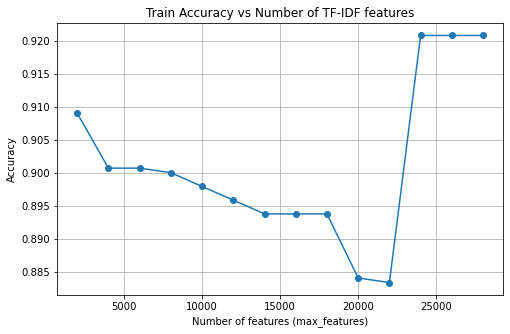

In [333]:
plt.figure(figsize=(8,5))
plt.plot(list(range(2000, 30000, 2000)), accuracies, marker='o')
plt.title("Train Accuracy vs Number of TF-IDF features")
plt.xlabel("Number of features (max_features)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


This is a very interesting behavior:
- Using more max words deteriorates the model performance, but when it uses >= 24,000 features, the performance accuracy jumps to 0.92.

I'll generate the solution for the test with 25,000 max words and I'll upload it to Kaggle.

In [456]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=25000)

In [457]:
X_train_tfidf = vectorizer.fit_transform(train.Text_after_cleaning)

In [458]:
X_test_tfidf = vectorizer.transform(test.Text_after_cleaning)

In [459]:
matrix_factorization = NMF(n_components=5)

In [460]:
train_pred = matrix_factorization.fit_transform(X_train_tfidf).argmax(axis=1)

In [461]:
obtain_best_accuracy(
            y_true=train['Category'].values, y_pred=train_pred, print_accuracy=True)

Best accuracy train data: 0.9208333333333333
Best mapping: {0: 'sport', 1: 'politics', 2: 'tech', 3: 'entertainment', 4: 'business'}


0.9208333333333333

In [462]:
test_pred = matrix_factorization.transform(X_test_tfidf).argmax(axis=1)

In [463]:
solution_kaggle(
    {0: 'sport', 1: 'politics', 2: 'tech', 3: 'entertainment', 4: 'business'},
    test_pred, 'data/second_solution.csv')

Great!, Now I obtained a score of:
- Kaggle test: 0.92380

#### 5) Improve the model performance 
In this part I'll use Word2Vec and Kmeans
- Word2Vec is a method that turns words into vectors.
- Words that appear in similar contexts (sentences) end up with similar vectors. For example, “cat” and “dog” often appear near words like “pet”, “food”, “animal”, so their vectors will be close in space.
- Word2Vec trains a small neural network to predict one of two things:
    - Skip-gram: given a word, predict its surrounding words.
        - Example: Input “cat” -> predict words like “the”, “is”, “cute”.
    - CBOW (Continuous Bag of Words): given surrounding words, predict the target word.
         - Example: Input “the ... is cute” → predict “cat”.

In [178]:
from gensim.models import Word2Vec

In [232]:
def simple_preprocess_keep_punct(text):
    # Conserve the puctuation as we saw they are important
    tokens = re.findall(r"\w+|[^\w\s]", text.lower(), re.UNICODE)
    return tokens

In [233]:
train_sentences = [simple_preprocess_keep_punct(doc) for doc in train.Text_after_cleaning]

In [234]:
test_sentences = [simple_preprocess_keep_punct(doc) for doc in test.Text_after_cleaning]

In [235]:
w2v_model = Word2Vec(
    sentences=train_sentences,
    vector_size=100,   # Embedding size
    window=5,          # Context window
    min_count=2,       # Ignore low frequent tokens
    sg=1,              # 1 = Skip-gram, 0 = CBOW
    workers=4,
    epochs=20
)

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


Obtain the document vector based on the Word2Vec model

In [415]:
def document_vector(words):
    # Filter words out of vocabulary
    words = [w for w in words if w in w2v_model.wv.key_to_index]
    if len(words) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(w2v_model.wv[words], axis=0)

In [416]:
train_embedding = np.vstack([document_vector(doc) for doc in train_sentences])

In [435]:
test_embedding = np.vstack([document_vector(doc) for doc in test_sentences])

In [465]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=102)
X_train_reduced = svd.fit_transform(train_embedding)

kmeans = KMeans(n_clusters=5, random_state=102)


In [466]:
y_pred_kmeans = kmeans.fit_predict(X_train_reduced)

/Users/salvadorbarcenas/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [467]:
obtain_best_accuracy(
            y_true=train['Category'].values, y_pred=y_pred_kmeans, print_accuracy=True)

Best accuracy train data: 0.9493055555555555
Best mapping: {0: 'entertainment', 1: 'politics', 2: 'tech', 3: 'sport', 4: 'business'}


0.9493055555555555

In [468]:
X_test_reduced = svd.transform(test_embedding)

In [469]:
y_test_pred_kmeans = kmeans.predict(X_test_reduced)

In [470]:
solution_kaggle(
    {0: 'entertainment', 1: 'politics', 2: 'tech', 3: 'sport', 4: 'business'},
    y_test_pred_kmeans, 'data/word2vec_solution.csv')

- Train solution Word2Vec + Truncated SVD + Kmeans: Score: 0.9493
- Test solution Word2Vec + Truncated SVD + Kmeans: Score:  0.94829

We can see that this solution is far better than using TfidfVectorizer + NMF method.

# Compare with supervised learning
Now, I'll use XGBoost in order to see how performs compared to unsupervised methods using the words embeddings.

In [474]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [475]:
category_encoder = LabelEncoder()
y_train_encoded = category_encoder.fit_transform(train.Category)

In [481]:
model = XGBClassifier(
    objective='multi:softmax',   # Multiclass classification
    num_class=5,  # Number of classes
    n_estimators=100,            # Number of trees
    max_depth=6,
    learning_rate=0.1,
    random_state=102,
    use_label_encoder=False
)

# Training
model.fit(train_embedding, y_train_encoded, verbose=True)

[15:22:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=102, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

Let's see the performance

In [485]:
y_pred_xgb = model.predict(train_embedding)
print('XGboost train accuracy:')
print(accuracy_score(y_train_encoded, y_pred_xgb))

XGboost train accuracy:
1.0


- It looks like it's overfitting, now I'll predict the test and upload to kaggle.

In [486]:
y_pred_xgb_test = model.predict(test_embedding)

In [487]:
y_pred_xgb_test = category_encoder.inverse_transform(y_pred_xgb_test)

In [489]:
test['Category'] = y_pred_xgb_test

In [491]:
test[['ArticleId', 'Category']].to_csv('data/xgb_solution.csv', index=False)

- XGBoost performance on test set: Score: 0.97006


Sure, it looks far better than unsupervised approaches, but the difference between train and test accuracy is bigger too.

#### 2) Discuss comparison with the unsupervised approach. You may try changing the train data size (e.g., Include only 10%, 20%, 50% of labels, and observe train/test performance changes). Which methods are data-efficient (require a smaller amount of data to achieve similar results)? What about overfitting?

I'll use the 30% of the train data and see the performance on supervised vs unsupervised algorithms.

In [493]:
from sklearn.model_selection import train_test_split

In [494]:
X_train_30_percent, X_train_70_percent, y_train_30_percent, y_train_70_percent = train_test_split(
    train_embedding, train['Category'].values, test_size=0.7, random_state=42
)

In [495]:
X_train_30_percent.shape

(432, 100)

In [496]:
X_train_70_percent.shape

(1008, 100)

#### XGBoost fewer data

In [498]:
y_train_30_percent_encoded = category_encoder.transform(y_train_30_percent)

In [501]:
y_train_70_percent_encoded = category_encoder.transform(y_train_70_percent)

In [500]:
model_fewer_data = XGBClassifier(
    objective='multi:softmax',   # Multiclass classification
    num_class=5,  # Number of classes
    n_estimators=100,            # Number of trees
    max_depth=6,
    learning_rate=0.1,
    random_state=102,
    use_label_encoder=False
)

# Training
model_fewer_data.fit(X_train_30_percent, y_train_30_percent_encoded, verbose=True)

[16:08:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_class=5, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=102, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

In [505]:
y_pred_30_percent = model_fewer_data.predict(X_train_30_percent)
y_pred_70_percent = model_fewer_data.predict(X_train_70_percent)

print('XGboost train 30% accuracy:')
print(accuracy_score(y_train_30_percent_encoded, y_pred_30_percent))
print('XGboost train (unseen data) 70% accuracy:')
print(accuracy_score(y_train_70_percent_encoded, y_pred_70_percent))


XGboost train 30% accuracy:
1.0
XGboost train (unseen data) 70% accuracy:
0.933531746031746


In [508]:
y_pred_xgb_test = model_fewer_data.predict(test_embedding)
y_pred_xgb_test = category_encoder.inverse_transform(y_pred_xgb_test)
test['Category'] = y_pred_xgb_test
test[['ArticleId', 'Category']].to_csv('data/xgb_solution_fewer_data.csv', index=False)

- In kaggle the test data is: 0.95510

#### Word2Vec + Truncated SVD + Kmeans fewer data

In [527]:
svd = TruncatedSVD(n_components=50, random_state=102)
X_train_reduced_30_percent = svd.fit_transform(X_train_30_percent)
X_train_reduced_70_percent = svd.transform(X_train_70_percent)

kmeans = KMeans(n_clusters=5, random_state=102)

In [528]:
y_pred_kmeans_30_percent = kmeans.fit_predict(X_train_reduced_30_percent)

/Users/salvadorbarcenas/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [529]:
y_pred_kmeans_70_percent = kmeans.predict(X_train_reduced_70_percent)

In [530]:
obtain_best_accuracy(
            y_true=y_train_30_percent, y_pred=y_pred_kmeans_30_percent, print_accuracy=True)

Best accuracy train data: 0.9467592592592593
Best mapping: {0: 'sport', 1: 'business', 2: 'entertainment', 3: 'tech', 4: 'politics'}


0.9467592592592593

In [531]:
obtain_best_accuracy(
            y_true=y_train_70_percent, y_pred=y_pred_kmeans_70_percent, print_accuracy=True)

Best accuracy train data: 0.9444444444444444
Best mapping: {0: 'sport', 1: 'business', 2: 'entertainment', 3: 'tech', 4: 'politics'}


0.9444444444444444

Now, let's see the test performance.

In [533]:
X_test_reduced = svd.transform(test_embedding)
y_test_pred_kmeans = kmeans.predict(X_test_reduced)

In [534]:
solution_kaggle(
    {0: 'sport', 1: 'business', 2: 'entertainment', 3: 'tech', 4: 'politics'},
    y_test_pred_kmeans, 'data/word2vec_solution_fewer_data.csv')

- Kaggle solution Word2Vec + Truncated SVD + Kmeans fewer data: 0.94149


### Conclusion of comparation between methods

Finally:
- Supervised method (XGBoost) accuracy using all training data:
    - Train:  1.0
    - Test: 0.97006
- Supervised method (XGBoost) accuracy using 30% of data:
    - Train(30%): 1.0
    - Train(70% unseen data): 0.9335
    - Test: 0.95510  


- Unsupervised method (Word2Vec + Truncated SVD) accuracy using all training data:
    - Train:  0.9493
    - Test: 0.94829
- Unsupervised method (Word2Vec + Truncated SVD) accuracy using 30% of data:
    - Train(30%): 0.9467
    - Train(70% unseen data): 0.944
    - Test: 0.941

- Unsupervised method (Word2Vec + Truncated SVD) is data-efficient, as it achieves almost the same result using only 30% of the data, while supervised learning method drops performance from 0.97 to 0.95 (in test data)
- Supervised method (XGboost) is more likely to overfit, even more so when there is less data